In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from scipy import stats
from pandas.plotting import scatter_matrix


In [3]:
import sklearn 
from sklearn.datasets import fetch_california_housing

In [4]:
#Fetching and displaying the data head
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#shape of the dataset for referenec
housing.shape

(20640, 9)

In [6]:
#drop any NULL values from the table
housing = housing.dropna()
housing.shape

(20640, 9)

In [7]:
#double check to verify presence of NULL values
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

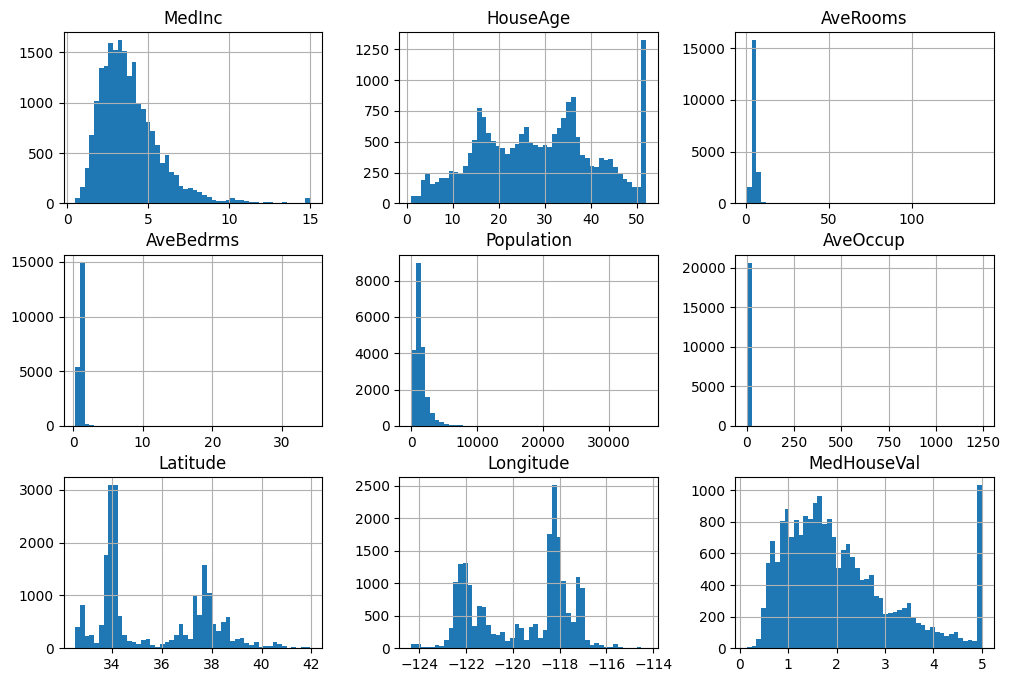

In [8]:
#visualize the data 
housing.hist(bins=50, figsize=(12,8))
plt.show()

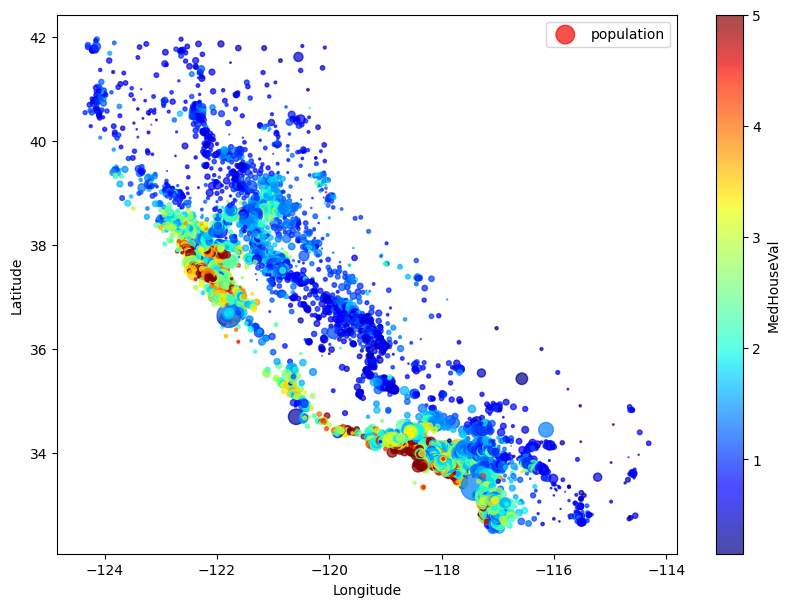

In [9]:
#scatter plot that plots the Latitude vs longitude and a marker that signifies population (/ 100 to scale down) 
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

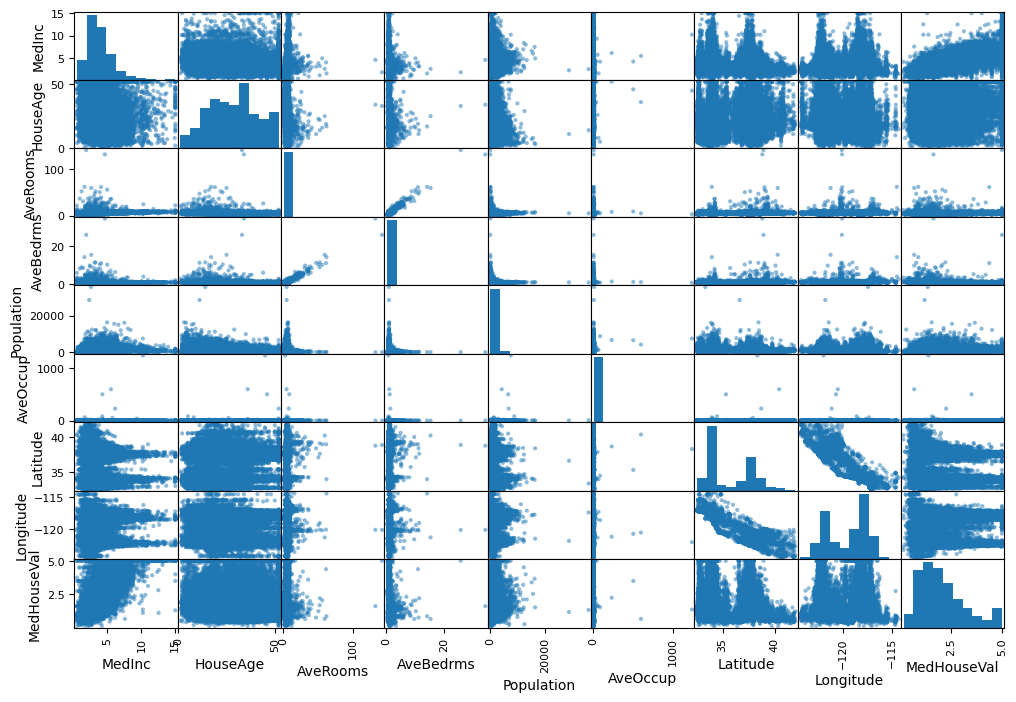

In [10]:
#define the attributes and plot each feature against each other to find a correlation
#directly calling the dataset without explicitly mentioning the attributes is also fine 
#attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(housing, figsize=(12,8))
plt.show()

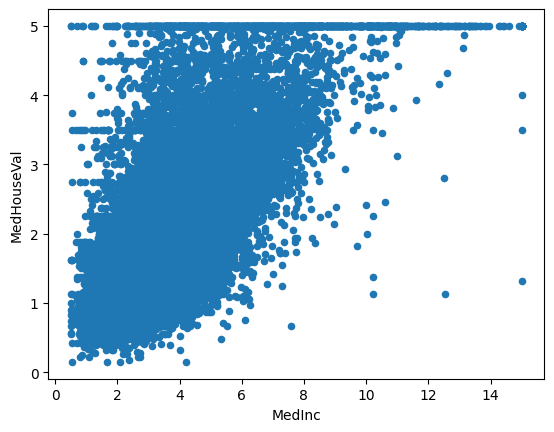

In [11]:
#found a relation between MedInc and MedHouseVal
#Plot the scatter plot to better understand this linear relation
housing.plot(kind="scatter", y="MedHouseVal", x="MedInc")
plt.show()

In [12]:
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=True)

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [13]:
#Split the dataset into training and testing 
from sklearn.model_selection import train_test_split
X= housing.iloc[:,:-1]
y=housing.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Size of Training Set Features:",len(X_train))
print("Size of Training Set Target Variable:",len(y_train))
print("Size of Testing Set Features:",len(X_test))
print("Size of Testing Set Target Variable:",len(y_test))

Size of Training Set Features: 16512
Size of Training Set Target Variable: 16512
Size of Testing Set Features: 4128
Size of Testing Set Target Variable: 4128


In [14]:
#printing the original full dataset for reference
housing.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [15]:
#showing the training dataset without shuffling
X_train.reset_index(drop=True, inplace=True)
X_train.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
1      3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
2      4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
3      1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
4      3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   
...       ...       ...       ...        ...         ...       ...       ...   
16507  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
16508  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
16509  2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
16510  5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
16511  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Lo

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
print(X_train_scaled)

[[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
  -1.18553953]
 [-0.68544764  1.85617335 -0.85144571 ... -0.08535429  0.99543676
  -1.41489815]]


In [18]:
#Now we have processed and scaled data, so we can apply different ML Models and use MSE as a metric to be evaluated and compared

In [19]:
# 1. LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_prediction = model.predict(X_train_scaled)

In [20]:
#Evaluate the accuracy of the model using mse of y_prediction and y_train
ms=mse(y_prediction,y_train)
ms

0.5179331255246699

In [21]:
final_hous_val = np.sqrt(ms)
final_hous_val

0.7196757085831575

In [22]:
#find out the range of the prices (target variable) to understand how accurate our model is
price_range = max(y_train) - min(y_train)
print("Range of Price:", price_range)

Range of Price: 4.85002


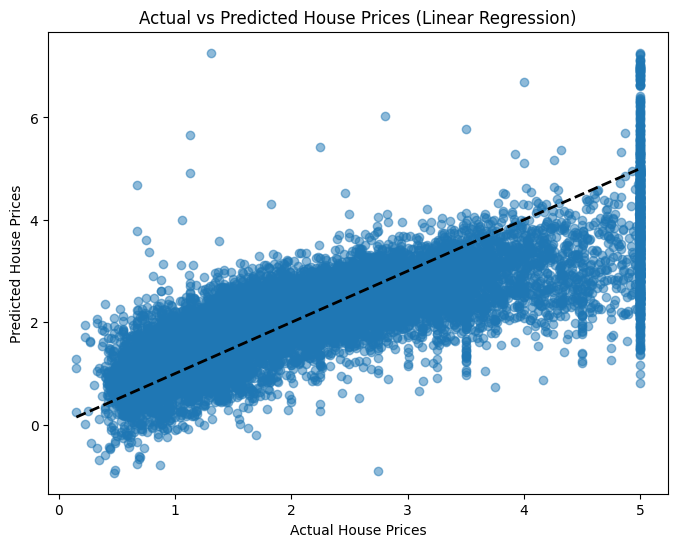

In [23]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()


In [24]:
#trying linear regression with one predictor model (medinc)
Feature= housing.iloc[:,0]
target=housing.iloc[:,-1]

In [25]:
#double checking the right feature
Feature.head
#target.head

<bound method NDFrame.head of 0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64>

In [26]:
#Based on an earlier observation, I am trying to fit a linear regression model to a single feature (MedInc)
#Because in an earlier visualization, it varied linearly with the target variable
#Attempting to assess the effect of that single feature on the target variable
#Reshapeing the feature is required because StandardScaler only takes input as array, so reshape it into 1x1 array rather than series
Feature_train, Feature_test, target_train, target_test = train_test_split(Feature, target, test_size=0.2, random_state=42)
scaler=StandardScaler()
Feature_train_reshaped = Feature_train.values.reshape(-1,1)
Feature_train_scaled = scaler.fit_transform(Feature_train_reshaped)

In [27]:
#define the model and fit it.
#Subsequently predict the values of the target variable
model = LinearRegression()
model.fit(Feature_train_scaled,target_train)
target_prediction = model.predict(Feature_train_scaled)

In [66]:
#Find mse as a measure of accuracy
ms1 = mse(target_prediction,target_train)
ms1

0.6991447170182823

In [71]:
#the value is higher than the earlier value 
accuracy = mse(target_prediction,target_train)
accuracy=np.sqrt(accuracy)
print("Accuracy of Linear Regression:", round(accuracy,2)*100,"%")

Accuracy of Linear Regression: 84.0 %


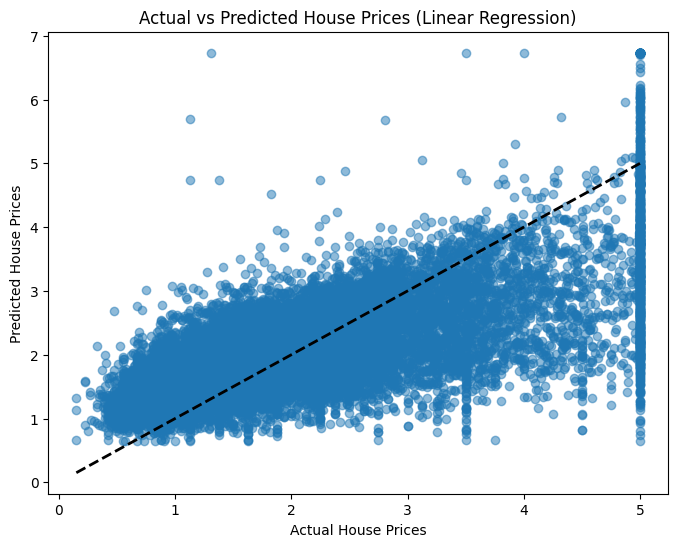

In [30]:
#plot is more scattered out compared to earlier value
#This means that considering multiple features results in a more accurate model as opposed to a single feature
plt.figure(figsize=(8, 6))
plt.scatter(target_train, target_prediction, alpha=0.5)
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()

In [53]:
k = len(X)
print(k)
np.sqrt(k)

20640


143.66627996854376

In [60]:
# 2. KNN

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor (n_neighbors = 144)
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=144)

In [61]:
y_prediction = regressor.predict(X_train_scaled)
ms1=mse(y_prediction,y_train)
print ("Mean Squared Error of Linear Regression model:", round (ms1,5)

0.46552567729256816

In [72]:
accuracy1 = mse(y_prediction,y_train)
accuracy1 = np.sqrt(accuracy1)
print("Accuracy of KNN:", round(accuracy1,2)*100, "%")

Accuracy of KNN: 68.0 %
